In [6]:
from sklearn import decomposition

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plot
import seaborn

In [2]:
data = pandas.read_csv('train.csv')

In [3]:
data

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,296,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
224,297,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,1
225,298,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
226,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


In [4]:
data.describe()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,224.000000,226.000000,228.000000
mean,153.600877,54.368421,0.697368,3.157895,131.982456,248.337719,0.140351,1.026316,148.675439,0.324561,1.010526,1.596491,0.683036,4.809735,0.473684
std,85.501492,9.003928,0.460408,0.967115,17.827852,49.388909,0.348115,0.993020,23.969693,0.469241,1.146215,0.604233,0.962283,1.944586,0.500406
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,81.500000,48.000000,0.000000,3.000000,120.000000,212.750000,0.000000,0.000000,131.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,155.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.250000,60.250000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## 年齡

* 1 -> 童年至少年（0~17歲）
* 2 -> 青年（18~40歲）
* 3 -> 中年（41至65歲）
* 4 -> 老年（65歲以上）

In [5]:
raw_age = data['age']

In [6]:
bins = [0, 17, 40, 65, raw_age.max()]
age_interval_with_label = pandas.DataFrame(pandas.cut(raw_age, bins).to_list(), columns=['age_interval_with_label'])
age_interval_without_label = pandas.DataFrame(numpy.add(pandas.cut(raw_age, bins, labels=False).to_list(), 1).tolist(), columns=['age_interval_without_label'])

In [7]:
age = pandas.DataFrame(raw_age)

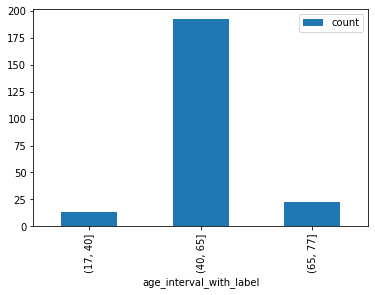

In [8]:
pandas.DataFrame(age_interval_with_label.groupby('age_interval_with_label').size(), columns=['count']).plot.bar()

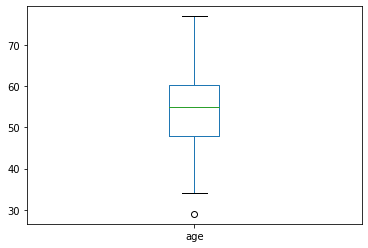

In [9]:
pandas.DataFrame(raw_age).plot.box()

## 性別

In [12]:
raw_sex = data['sex']
sex = pandas.DataFrame(raw_sex)

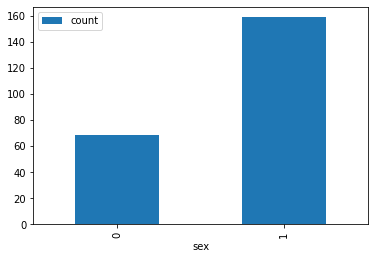

In [13]:
pandas.DataFrame(sex.groupby('sex').size(), columns=['count']).plot.bar()

## 心絞痛

* 1 -> 典型心絞痛
* 2 -> 非典型心絞痛
* 3 -> 非心絞痛
* 4 -> 無症狀

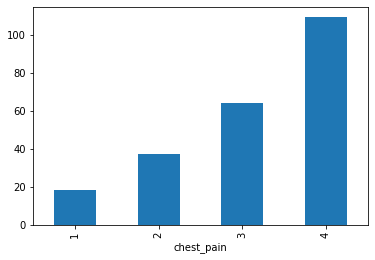

In [14]:
data.groupby('chest_pain').size().plot.bar()

## 收縮壓
* 1 -> 小於120，屬正常血壓
* 2 -> 介於120~139，正常但偏高（可能為前期高血壓）
* 3 -> 大於等於140，高血壓

In [15]:
bins = [0, 120, 139, data['resting_bp'].max()]
resting_bp_interval_with_label = pandas.DataFrame(pandas.cut(data['resting_bp'], bins).to_list(), columns=['resting_bp_interval_with_label'])
resting_bp_interval_without_label = pandas.DataFrame(numpy.add(pandas.cut(data['resting_bp'], bins, labels=False).to_list(), 1).tolist(), columns=['resting_bp_interval_without_label'])

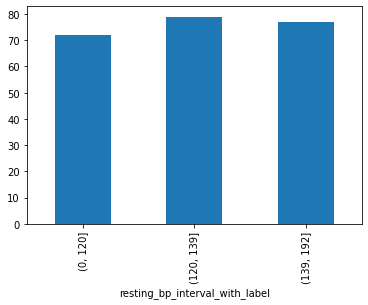

In [16]:
resting_bp_interval_with_label.groupby('resting_bp_interval_with_label').size().plot.bar()

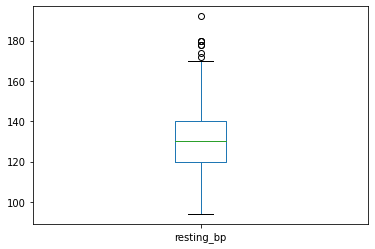

In [17]:
pandas.DataFrame(data['resting_bp']).plot.box()

## 總膽固醇

* 1 -> 小於130
* 2 -> 最佳值130~200
* 3 -> 200~239略高
* 4 -> 240以上，心臟疾病大幅提升

In [18]:
bins = [0, 129, 200, 239, data['cholestoral'].max()]
cholestoral_interval_with_label = pandas.DataFrame(pandas.cut(data['cholestoral'], bins).to_list(), columns=['cholestoral_interval_with_label'])
cholestoral_interval_without_label = pandas.DataFrame(numpy.add(pandas.cut(data['cholestoral'], bins, labels=False).to_list(), 1).tolist(), columns=['cholestoral_interval_without_label'])

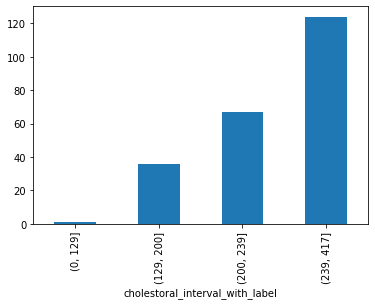

In [19]:
cholestoral_interval_with_label.groupby('cholestoral_interval_with_label').size().plot.bar()

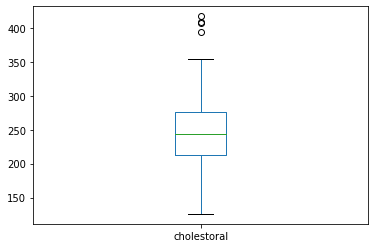

In [20]:
pandas.DataFrame(data['cholestoral']).plot.box()

## 整理已篩選的欄位資料

In [21]:
totalData = pandas.concat([data, age_interval_without_label, age_interval_with_label, resting_bp_interval_without_label, resting_bp_interval_with_label, cholestoral_interval_without_label, cholestoral_interval_with_label], axis=1)

In [22]:
filtered_data = totalData[['id', 'age', 'age_interval_without_label', 'age_interval_with_label', 'sex', 'chest_pain', 'resting_bp', 'resting_bp_interval_without_label', 'resting_bp_interval_with_label', 'cholestoral', 'cholestoral_interval_without_label', 'cholestoral_interval_with_label', 'heart_disease']]

In [23]:
filtered_data

,id,age,age_interval_without_label,age_interval_with_label,sex,chest_pain,resting_bp,resting_bp_interval_without_label,resting_bp_interval_with_label,cholestoral,cholestoral_interval_without_label,cholestoral_interval_with_label,heart_disease
0,1,63,3,"(40, 65]",1,1,145,3,"(139, 192]",233,3,"(200, 239]",0
1,2,67,4,"(65, 77]",1,4,160,3,"(139, 192]",286,4,"(239, 417]",1
2,3,67,4,"(65, 77]",1,4,120,1,"(0, 120]",229,3,"(200, 239]",1
3,5,41,3,"(40, 65]",0,2,130,2,"(120, 139]",204,3,"(200, 239]",0
4,6,56,3,"(40, 65]",1,2,120,1,"(0, 120]",236,3,"(200, 239]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,296,41,3,"(40, 65]",1,2,120,1,"(0, 120]",157,2,"(129, 200]",0
224,297,59,3,"(40, 65]",1,4,164,3,"(139, 192]",176,2,"(129, 200]",1
225,298,57,3,"(40, 65]",0,4,140,3,"(139, 192]",241,4,"(239, 417]",1
226,301,57,3,"(40, 65]",1,4,130,2,"(120, 139]",131,2,"(129, 200]",1


In [27]:
filtered_data.to_csv('EDA.csv', index=0)

In [25]:
filtered_data[['age', 'sex', 'chest_pain', 'resting_bp', 'cholestoral', 'heart_disease']].corr()

,age,sex,chest_pain,resting_bp,cholestoral,heart_disease
age,1.000000,-0.141951,0.088905,0.258780,0.216043,0.198686
sex,-0.141951,1.000000,-0.020829,-0.051100,-0.228545,0.261655
chest_pain,0.088905,-0.020829,1.000000,-0.046085,0.150318,0.409146
resting_bp,0.258780,-0.051100,-0.046085,1.000000,0.129244,0.155990
cholestoral,0.216043,-0.228545,0.150318,0.129244,1.000000,0.144652
heart_disease,0.198686,0.261655,0.409146,0.155990,0.144652,1.000000


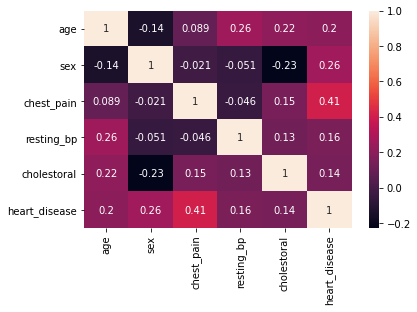

In [26]:
seaborn.heatmap(filtered_data[['age', 'sex', 'chest_pain', 'resting_bp', 'cholestoral', 'heart_disease']].corr(), annot=True)
plot.show()

## 結論

* 提供了各個單一欄位的bar chart與box chart
* 已查詢過總膽固醇、收縮壓的標準值，並將其分成各區間（如每個欄位的開頭說明）
* 根據相關係數矩陣來看，胸痛跟心臟病有最直接的關係，其次再來是性別、年齡，但其實我覺得這只是從數據上來看，實際資料分析，膽固醇跟收縮壓應該是會有影響才對